In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 10)

random_state= 11

In [2]:
df = pd.read_csv('data/treasury_rates.csv')

In [3]:
df

DATE DGS6MO  DGS1  DGS2  DGS5 DGS10 DGS30
0     1986-02-18   7.42  7.56  7.96  8.28  8.64  8.89
1     1986-02-19   7.51  7.67  8.06  8.37   8.7  8.92
2     1986-02-20   7.54  7.68  8.05  8.39  8.67  8.88
3     1986-02-21   7.42  7.56  7.93  8.24  8.48  8.73
4     1986-02-24   7.41  7.53  7.86   8.2  8.39  8.61
...          ...    ...   ...   ...   ...   ...   ...
9188  2021-05-07   0.04  0.05  0.14  0.77   1.6  2.28
9189  2021-05-10   0.04  0.05  0.16   0.8  1.63  2.32
9190  2021-05-11   0.04  0.05  0.16   0.8  1.64  2.35
9191  2021-05-12   0.04  0.05  0.16  0.87  1.69   2.4
9192  2021-05-13   0.03  0.05  0.16  0.84  1.66  2.39

[9193 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    9193 non-null   object
 1   DGS6MO  9193 non-null   object
 2   DGS1    9193 non-null   object
 3   DGS2    9193 non-null   object
 4   DGS5    9193 non-null   object
 5   DGS10   9193 non-null   object
 6   DGS30   9193 non-null   object
dtypes: object(7)
memory usage: 502.9+ KB


* Date needs to be set to datetime
* Other values should be floats.  I suspect this is because the null values are '.'

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    9193 non-null   datetime64[ns]
 1   DGS6MO  9193 non-null   object        
 2   DGS1    9193 non-null   object        
 3   DGS2    9193 non-null   object        
 4   DGS5    9193 non-null   object        
 5   DGS10   9193 non-null   object        
 6   DGS30   9193 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 502.9+ KB


In [7]:
df.head(20)

DATE DGS6MO  DGS1  DGS2  DGS5 DGS10 DGS30
0  1986-02-18   7.42  7.56  7.96  8.28  8.64  8.89
1  1986-02-19   7.51  7.67  8.06  8.37   8.7  8.92
2  1986-02-20   7.54  7.68  8.05  8.39  8.67  8.88
3  1986-02-21   7.42  7.56  7.93  8.24  8.48  8.73
4  1986-02-24   7.41  7.53  7.86   8.2  8.39  8.61
5  1986-02-25   7.43  7.59  7.89  8.21   8.4   8.6
6  1986-02-26   7.42  7.57  7.88  8.07  8.36  8.54
7  1986-02-27   7.36  7.48  7.72  7.91  8.15  8.32
8  1986-02-28   7.36  7.43  7.71  7.91  8.13  8.27
9  1986-03-03    7.3  7.35  7.55  7.76  7.99  8.16
10 1986-03-04   7.11  7.23  7.38  7.55  7.93   8.1
11 1986-03-05   7.16   7.3  7.54  7.76  8.12  8.26
12 1986-03-06   7.02  7.14  7.38  7.68  8.04  8.19
13 1986-03-07   6.93  7.07  7.29  7.56  7.96  8.15
14 1986-03-10   6.87  7.01  7.16  7.41  7.76     8
15 1986-03-11   6.88  7.03  7.15  7.35   7.7  7.94
16 1986-03-12   6.91  7.04  7.17  7.37  7.68  7.91
17 1986-03-13   6.96  7.07  7.21  7.46  7.75  7.95
18 1986-03-14   6.88     7  7.18   7.4  7.72  7.95
19 1986-03-17   6.92  7.03  7.22  7.42  7.77  7.97

* The missing data here is from Christmas and New Years, which makes sense since the market is closed.
* I'll fill in the missing data from the value of the previous day.

In [8]:
df = df.replace('.', np.nan).ffill(axis=0)

In [9]:
df

DATE DGS6MO  DGS1  DGS2  DGS5 DGS10 DGS30
0    1986-02-18   7.42  7.56  7.96  8.28  8.64  8.89
1    1986-02-19   7.51  7.67  8.06  8.37   8.7  8.92
2    1986-02-20   7.54  7.68  8.05  8.39  8.67  8.88
3    1986-02-21   7.42  7.56  7.93  8.24  8.48  8.73
4    1986-02-24   7.41  7.53  7.86   8.2  8.39  8.61
...         ...    ...   ...   ...   ...   ...   ...
9188 2021-05-07   0.04  0.05  0.14  0.77   1.6  2.28
9189 2021-05-10   0.04  0.05  0.16   0.8  1.63  2.32
9190 2021-05-11   0.04  0.05  0.16   0.8  1.64  2.35
9191 2021-05-12   0.04  0.05  0.16  0.87  1.69   2.4
9192 2021-05-13   0.03  0.05  0.16  0.84  1.66  2.39

[9193 rows x 7 columns]

In [10]:
df = df.rename(columns={'DATE': 'date',
                        'DGS6MO': 'mo_6',
                        'DGS1': 'yr_1',
                        'DGS2': 'yr_2',
                        'DGS5': 'yr_5',
                        'DGS10': 'yr_10',
                        'DGS30': 'yr_30'})

In [11]:
df.set_index('date', inplace=True)

In [12]:
df = df['1989':]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mo_6    8444 non-null   object
 1   yr_1    8444 non-null   object
 2   yr_2    8444 non-null   object
 3   yr_5    8444 non-null   object
 4   yr_10   8444 non-null   object
 5   yr_30   8444 non-null   object
dtypes: object(6)
memory usage: 461.8+ KB


In [15]:
df =df.iloc[:,0:] = df.iloc[:,0:].astype('float')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8444 entries, 1989-01-02 to 2021-05-13
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mo_6    8444 non-null   float64
 1   yr_1    8444 non-null   float64
 2   yr_2    8444 non-null   float64
 3   yr_5    8444 non-null   float64
 4   yr_10   8444 non-null   float64
 5   yr_30   8444 non-null   float64
dtypes: float64(6)
memory usage: 461.8 KB


In [17]:
df['ys'] = df['yr_10'] - df['mo_6']

In [18]:
df.describe()

mo_6         yr_1         yr_2         yr_5        yr_10  \
count  8444.000000  8444.000000  8444.000000  8444.000000  8444.000000   
mean      2.970870     3.091595     3.377055     3.959298     4.485083   
std       2.497012     2.495160     2.504342     2.322941     2.111447   
min       0.020000     0.050000     0.090000     0.190000     0.520000   
25%       0.380000     0.520000     0.910000     1.790000     2.610000   
50%       2.490000     2.600000     3.025000     3.850000     4.370000   
75%       5.162500     5.260000     5.520000     5.850000     6.060000   
max       9.690000     9.850000     9.920000     9.750000     9.530000   

             yr_30           ys  
count  8444.000000  8444.000000  
mean      5.017933     1.514212  
std       1.902097     1.135793  
min       0.990000    -0.790000  
25%       3.200000     0.530000  
50%       4.930000     1.460000  
75%       6.360000     2.470000  
max       9.310000     3.740000

In [19]:
df

mo_6  yr_1  yr_2  yr_5  yr_10  yr_30    ys
date                                                  
1989-01-02  8.67  9.02  9.14  9.14   9.14   9.00  0.47
1989-01-03  8.77  9.11  9.21  9.25   9.23   9.09  0.46
1989-01-04  8.87  9.14  9.25  9.24   9.22   9.08  0.35
1989-01-05  8.97  9.22  9.32  9.32   9.27   9.10  0.30
1989-01-06  8.97  9.20  9.32  9.30   9.25   9.06  0.28
...          ...   ...   ...   ...    ...    ...   ...
2021-05-07  0.04  0.05  0.14  0.77   1.60   2.28  1.56
2021-05-10  0.04  0.05  0.16  0.80   1.63   2.32  1.59
2021-05-11  0.04  0.05  0.16  0.80   1.64   2.35  1.60
2021-05-12  0.04  0.05  0.16  0.87   1.69   2.40  1.65
2021-05-13  0.03  0.05  0.16  0.84   1.66   2.39  1.63

[8444 rows x 7 columns]

<AxesSubplot:xlabel='date'>

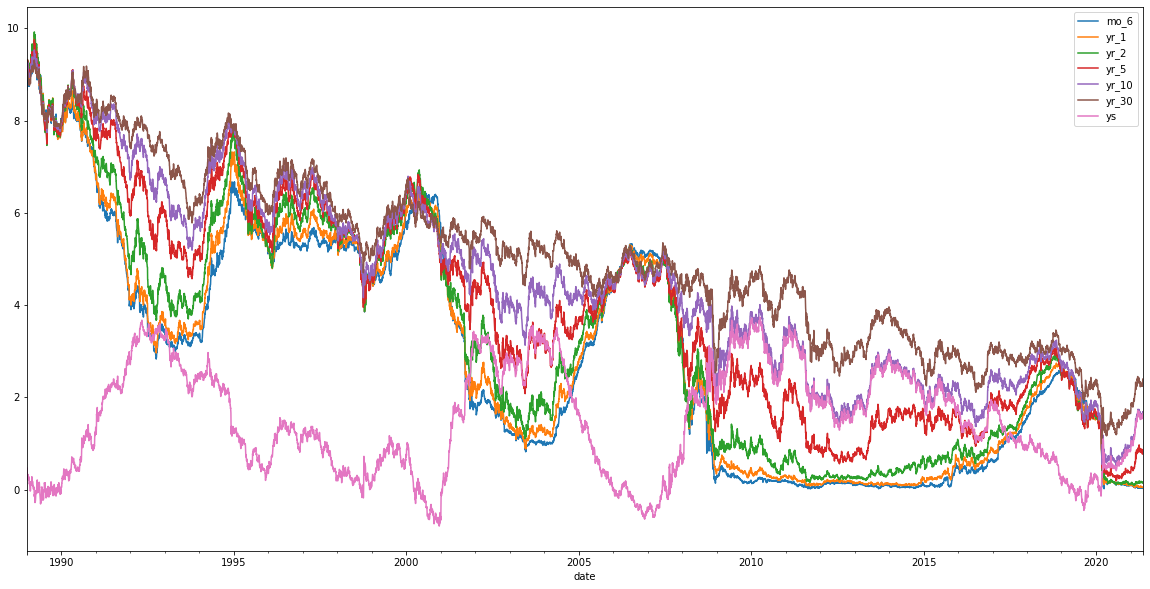

In [20]:
df.plot()

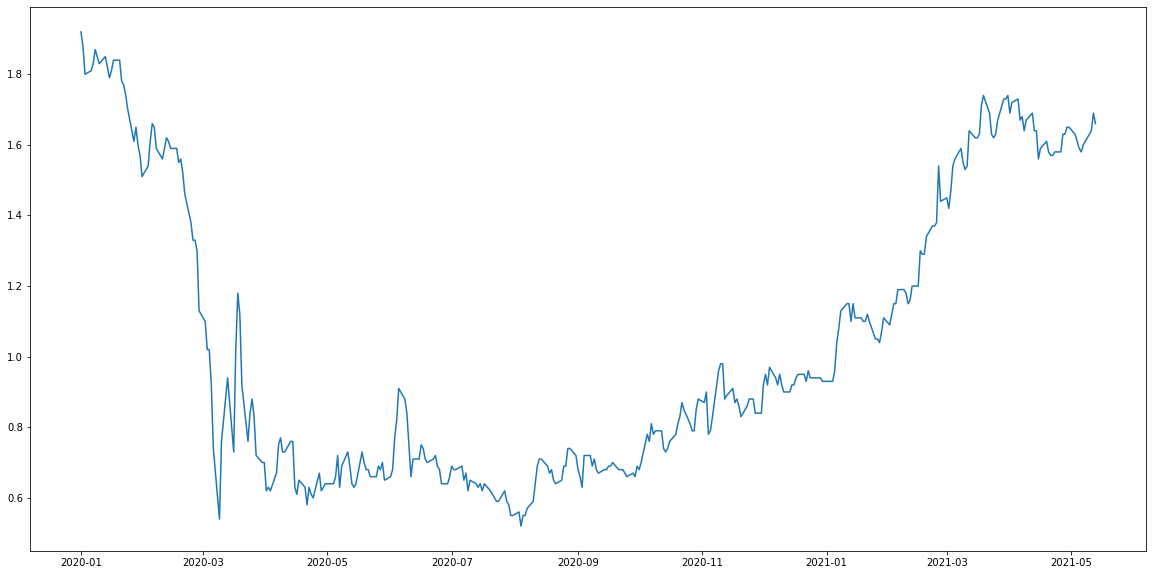

In [21]:
plt.plot(df['yr_10']['2020':])

(array([1630., 2217., 2304., 1521.,  772.]),
 array([0.52 , 2.322, 4.124, 5.926, 7.728, 9.53 ]),
 <BarContainer object of 5 artists>)

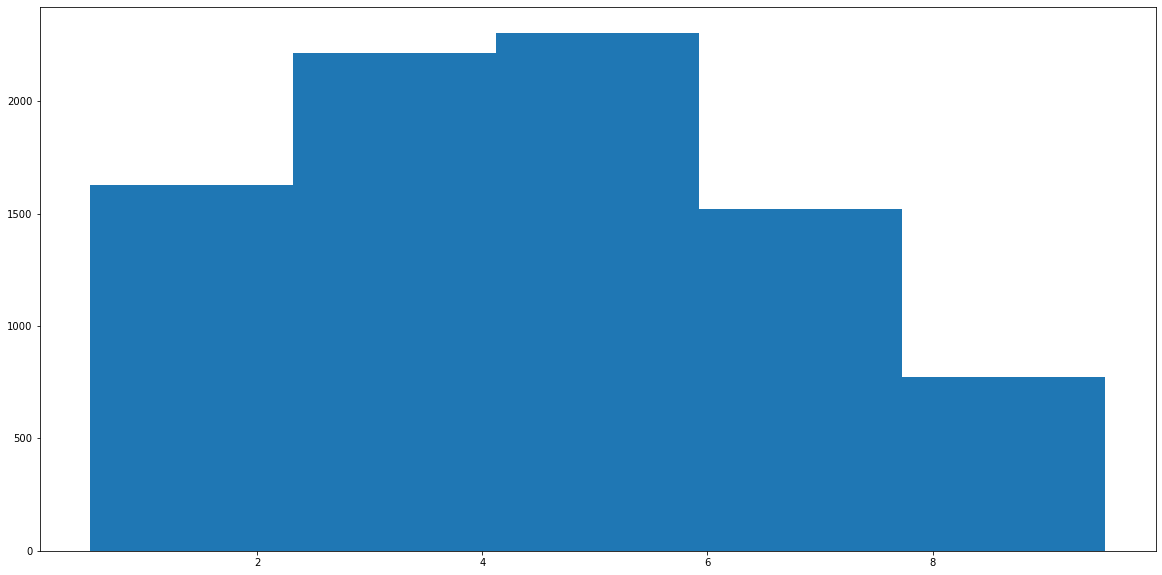

In [22]:
plt.hist(df['yr_10'], bins=5)

In [23]:
roll_mean = df['yr_10'].rolling(window=90, center=False).mean()
roll_std= df['yr_10'].rolling(window=90, center=False).std()

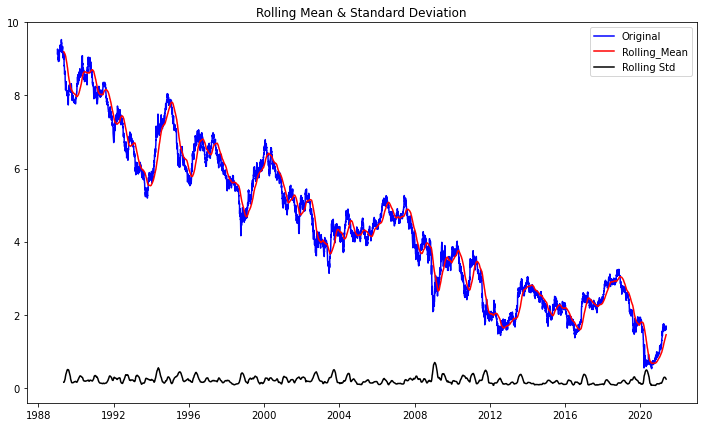

In [24]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['yr_10'], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling_Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

* The standard deviation doesn't seem to be too off.
* It's really hard to make a judgement based on this.

In [25]:
minus_rm = (df['yr_10'] - roll_mean).dropna()

In [26]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df['yr_10'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -1.843206
p-value                           0.359232
#Lags Used                       22.000000
Number of Observations Used    8421.000000
Critical Value (1%)              -3.431127
Critical Value (5%)              -2.861883
Critical Value (10%)             -2.566953
dtype: float64


* p-value is above 0.05, so we are not stationary

* Let's subract the rolling mean from the values

In [27]:
ys_month = df['yr_10'].resample('MS').mean()
ys_std = df['yr_10'].resample('MS').std()

In [28]:
minus_rm = (df['yr_10'] - roll_mean).dropna().resample('MS').mean()

In [29]:
ys_md = np.diff(ys_month)
ys_std = np.diff(ys_std)
ys_orig = np.array(ys_month)

In [30]:
rm_monthly =roll_mean.resample('MS').mean()

In [31]:
ys_md

array([ 0.07822727,  0.19036957, -0.18536957, -0.32506522, -0.57316206,
       -0.25536797,  0.09070393,  0.07786749, -0.18183983, -0.13727273,
       -0.03612554,  0.3547619 ,  0.2805    ,  0.11813636,  0.18993506,
       -0.02335404, -0.27521739, -0.01181818,  0.28442688,  0.1388913 ,
       -0.17497826, -0.32561265, -0.30995671,  0.00774327, -0.23769565,
        0.25614286, -0.06805195,  0.03003953,  0.21486957, -0.01182609,
       -0.37217391, -0.24190476, -0.13244306, -0.10850932, -0.33805195,
       -0.05822134,  0.32063043,  0.20077273, -0.06318182, -0.08909091,
       -0.12818182, -0.41355731, -0.26254658, -0.17116883,  0.17136364,
        0.28742424, -0.10681159, -0.16175983, -0.3412619 , -0.28828261,
       -0.00567194,  0.07188312, -0.0787013 , -0.15954545, -0.12545455,
       -0.32      , -0.02725108,  0.39861472,  0.04264822, -0.01983437,
        0.22709524,  0.5036087 ,  0.47453416,  0.22331169, -0.07909091,
        0.19863636, -0.06391304,  0.20982213,  0.29599567,  0.20

In [32]:
dftest = adfuller(ys_md)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print ('Results of Dickey-Fuller test: \n')

print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                -9.583504e+00
p-value                        2.127319e-16
#Lags Used                     4.000000e+00
Number of Observations Used    3.830000e+02
Critical Value (1%)           -3.447540e+00
Critical Value (5%)           -2.869116e+00
Critical Value (10%)          -2.570806e+00
dtype: float64


* We are definitely stationary now.  Let's plot this.

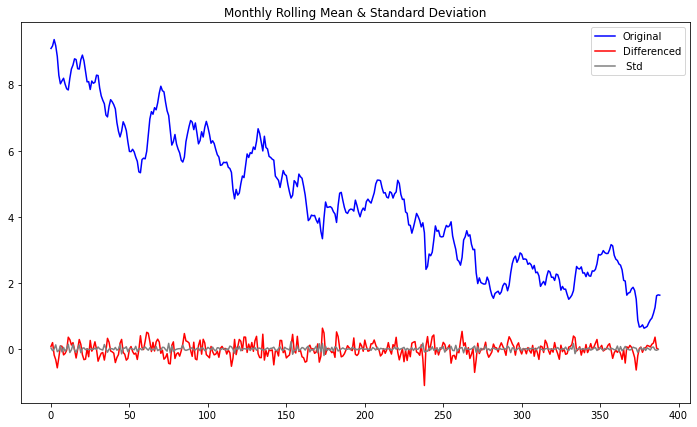

In [33]:
fig = plt.figure(figsize=(12,7))
plt.plot(ys_orig, color='blue', label='Original')
plt.plot(ys_md, color='red', label='Differenced')
plt.plot(ys_std, color='grey', label = ' Std')
plt.legend(loc='best')
plt.title('Monthly Rolling Mean & Standard Deviation')
plt.show(block=False)

### EWR

In [34]:
exp_roll_mean = df['yr_10'].ewm(halflife=45).mean()

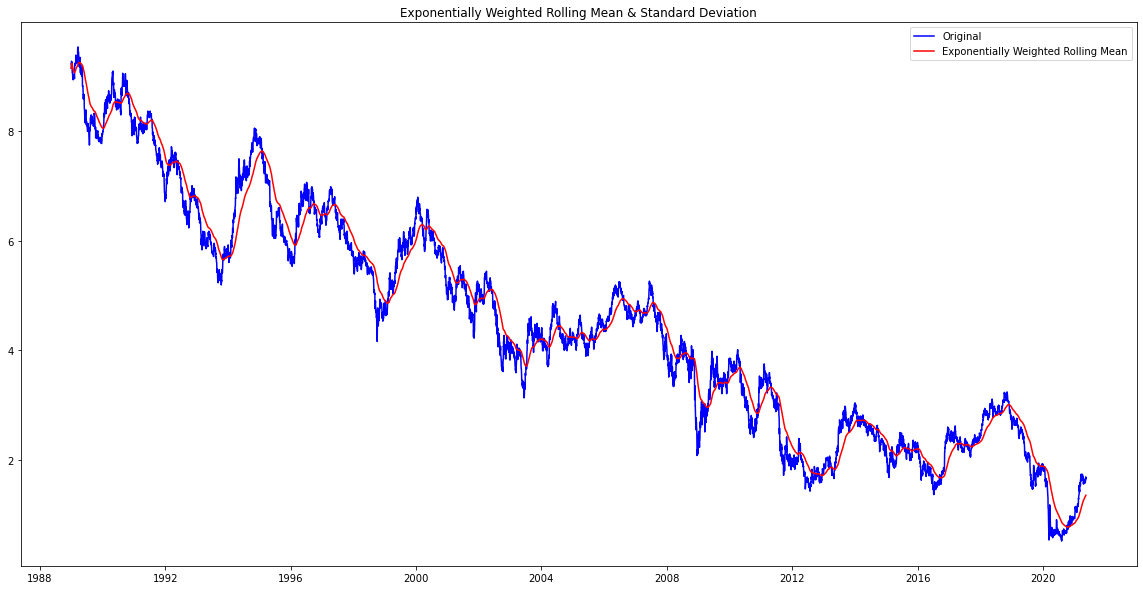

In [35]:

orig = plt.plot(df['yr_10'], color='blue',label='Original')
mean = plt.plot(exp_roll_mean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

In [36]:
minus_erm =(df['yr_10'] - exp_roll_mean).dropna()
minus_erm

date
1989-01-02    0.000000
1989-01-03    0.044653
1989-01-04    0.022924
1989-01-05    0.054270
1989-01-06    0.027203
                ...   
2021-05-07    0.263626
2021-05-10    0.289138
2021-05-11    0.294566
2021-05-12    0.339299
2021-05-13    0.304571
Name: yr_10, Length: 8444, dtype: float64

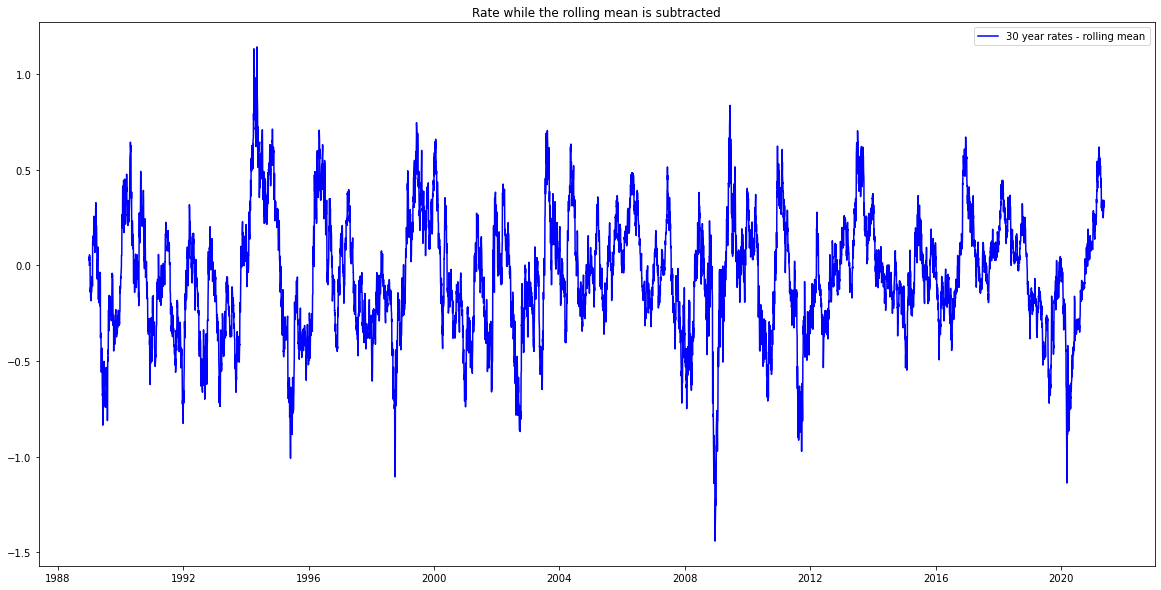

In [37]:
plt.plot(minus_erm, color='blue',label='30 year rates - rolling mean')
plt.legend(loc='best')
plt.title('Rate while the rolling mean is subtracted')
plt.show(block=False)

In [38]:
dts =minus_rm.groupby(pd.Grouper(freq='M'))

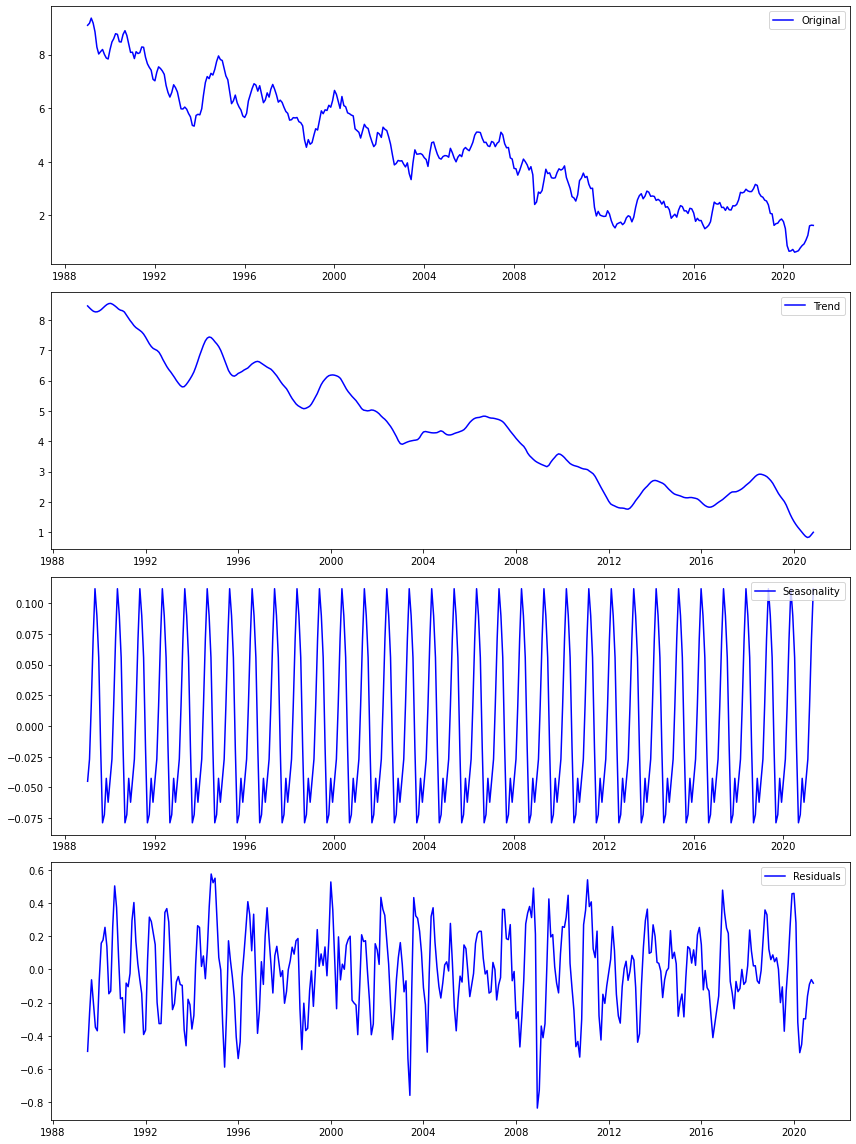

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposition = seasonal_decompose(ys_month)

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,16))
plt.subplot(411)
plt.plot(ys_month, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

In [132]:
ys_month

date
1989-01-01    9.092273
1989-02-01    9.170500
1989-03-01    9.360870
1989-04-01    9.175500
1989-05-01    8.850435
                ...   
2021-01-01    1.075238
2021-02-01    1.255000
2021-03-01    1.610870
2021-04-01    1.635000
2021-05-01    1.625556
Freq: MS, Name: yr_10, Length: 389, dtype: float64

<AxesSubplot:xlabel='date', ylabel='yr_10'>

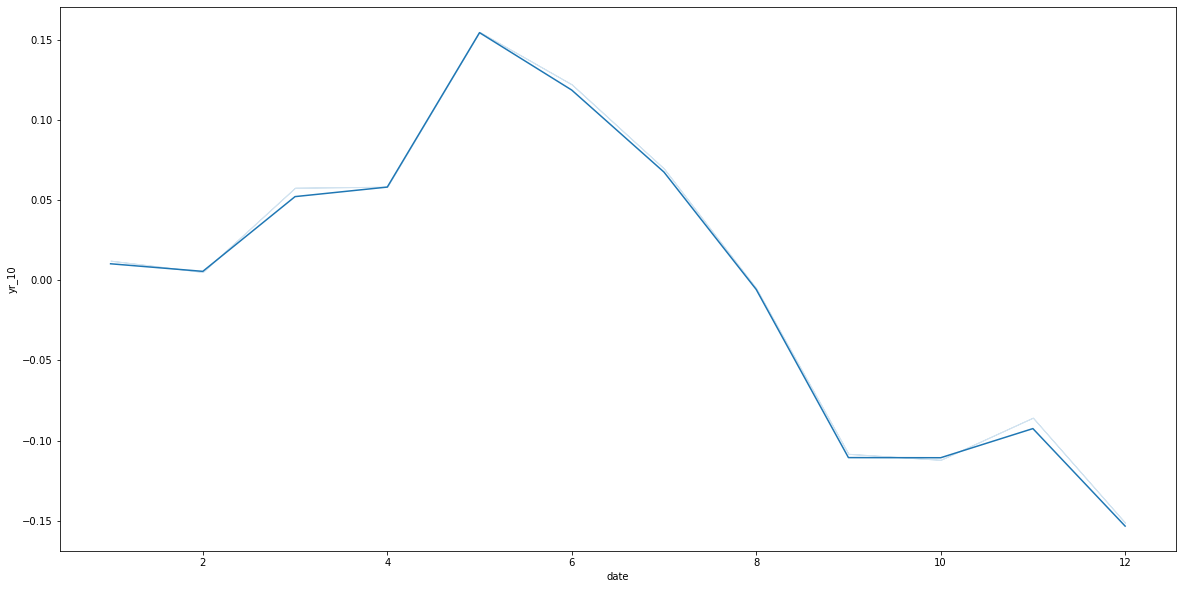

In [136]:
sns.lineplot(x=df.index.month, y=(df['yr_10']-df['yr_10'].mean()), ci=False)


<AxesSubplot:xlabel='date', ylabel='yr_10'>

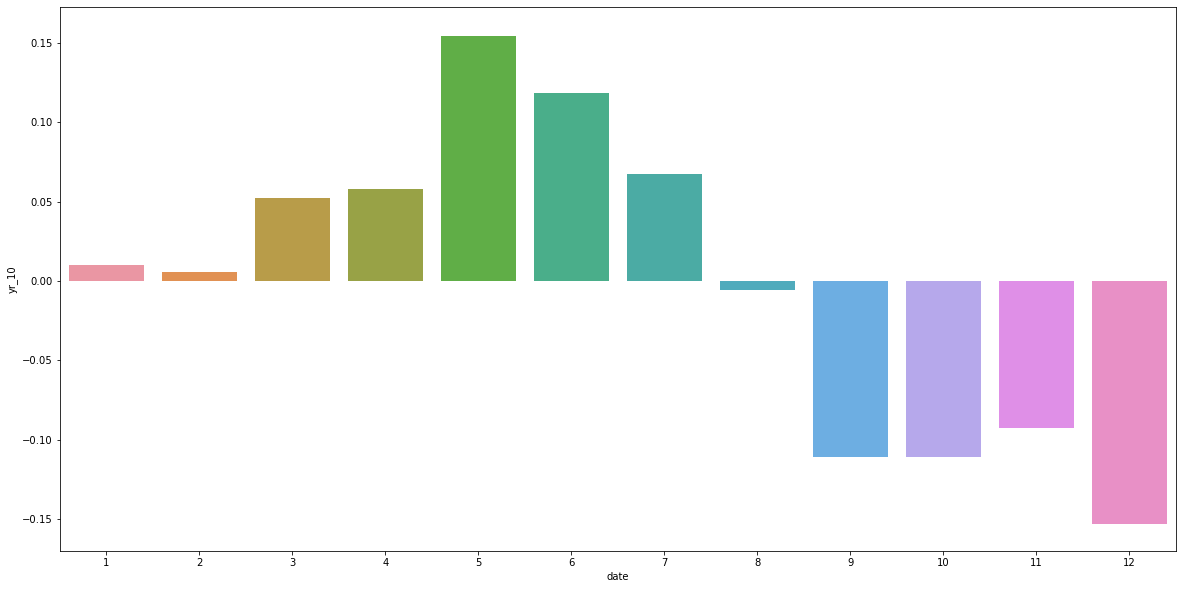

In [138]:
sns.barplot(x=df.index.month, y=(df['yr_10']-df['yr_10'].mean()), ci=False)

## Train Test Split

In [42]:
twenty = int(len(minus_rm) * 0.2)
train, test = minus_rm[:-twenty], minus_rm[-twenty:]

In [43]:
print(len(train))
print(len(test))

308
77


In [44]:
twenty

77

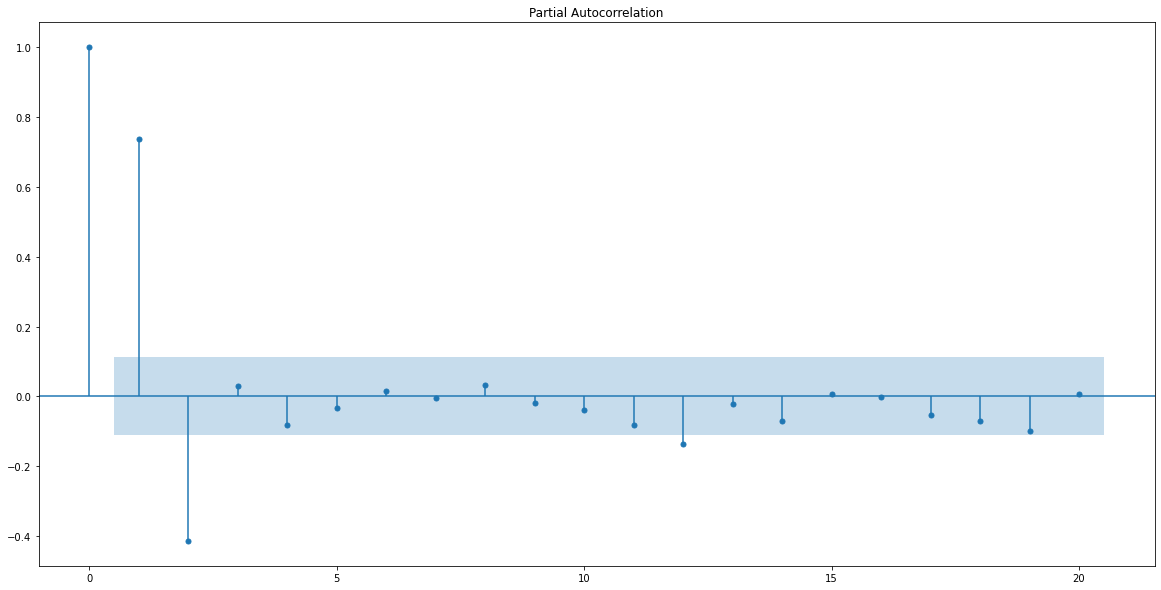

In [45]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

plot_pacf(train, lags=20);

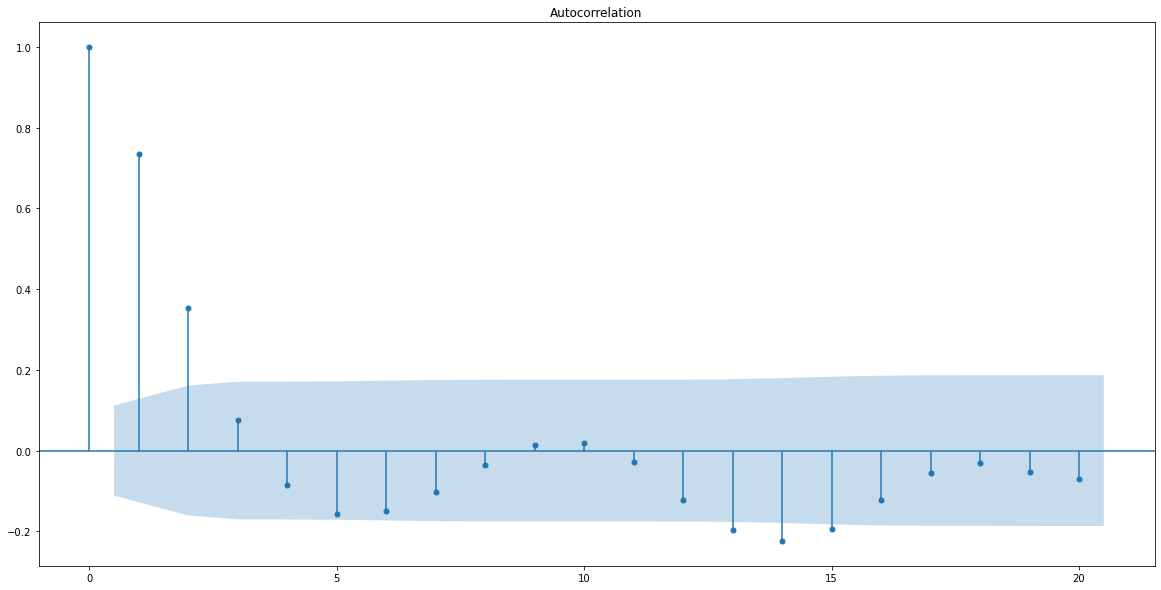

In [46]:
plot_acf(train, lags=20);

* Based on this, it looks like the p and q would be 3.

In [47]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm


In [48]:

p = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        try:
            model = ARMA(np.asarray(train), order=(ar, ma)).fit()
            print('Combo:', (ar, ma),'AIC:', model.aic)

            if value is None or model.aic < value:
                combo, value = ((ar, ma), model.aic)
                print(f'\tBest Parameters Updated')
        except ValueError:
            pass
            
print(f'\n{"*"*20}\nOptimal ARMA order: {combo}') 


Combo: (0, 0) AIC: 144.7916273940807
	Best Parameters Updated
Combo: (0, 1) AIC: -69.56057056783595
	Best Parameters Updated
Combo: (0, 2) AIC: -131.53407293012583
	Best Parameters Updated
Combo: (0, 3) AIC: -140.46280770203703
	Best Parameters Updated
Combo: (1, 0) AIC: -93.27137195256307
Combo: (1, 1) AIC: -139.4903382965066
Combo: (1, 2) AIC: -141.91190005449107
	Best Parameters Updated
Combo: (1, 3) AIC: -140.5170906370845
Combo: (2, 0) AIC: -146.35839082084794
	Best Parameters Updated
Combo: (2, 1) AIC: -144.64037105583134
Combo: (2, 2) AIC: -153.34823166065325
	Best Parameters Updated
Combo: (2, 3) AIC: -153.12324356378394
Combo: (3, 0) AIC: -144.5304165785226
Combo: (3, 1) AIC: -143.06164056239413
Combo: (3, 2) AIC: -153.37841716602065
	Best Parameters Updated
Combo: (3, 3) AIC: -149.2955733378908

********************
Optimal ARMA order: (3, 2)
C:\Users\saifw\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian fai

* These are all so close together.
* Best performance is for (3,0), but there are only modest gains after (0,1)

In [49]:
test

date
2015-01-01   -0.380929
2015-02-01   -0.159844
2015-03-01   -0.037061
2015-04-01   -0.066273
2015-05-01    0.207667
                ...   
2021-01-01    0.211815
2021-02-01    0.292617
2021-03-01    0.497667
2021-04-01    0.331990
2021-05-01    0.205654
Freq: MS, Name: yr_10, Length: 77, dtype: float64

In [50]:
def run_arma(trn, tst, p, q):

    model = ARMA(np.asarray(trn), order=(p,q)).fit()
    print(model.summary())

    pred = model.forecast(steps=77)[0]
    mse =  round(mean_squared_error(tst, pred), 3)

    print(f'Mean Sqared Error for Test: {mse}')

    return model, pred, mse



In [51]:
model_1, pred_1, mse_1 =run_arma(train, test, 2,2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(2, 2)   Log Likelihood                  82.674
Method:                       css-mle   S.D. of innovations              0.184
Date:                Wed, 19 May 2021   AIC                           -153.348
Time:                        15:31:48   BIC                           -130.968
Sample:                             0   HQIC                          -144.399
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.003    -14.673      0.000      -0.046      -0.035
ar.L1.y        1.5587      0.053     29.444      0.000       1.455       1.662
ar.L2.y       -0.6156      0.053    -11.612      0.0

In [52]:
pred_ir = rm_monthly[-77:]+pred_1
pred_ir

date
2015-01-01    2.084298
2015-02-01    1.979730
2015-03-01    1.948092
2015-04-01    1.890713
2015-05-01    1.896858
                ...   
2021-01-01    0.822766
2021-02-01    0.921726
2021-03-01    1.072546
2021-04-01    1.262353
2021-05-01    1.379244
Freq: MS, Name: yr_10, Length: 77, dtype: float64

In [53]:
true_ir =ys_month[-77:]
true_ir

date
2015-01-01    1.892273
2015-02-01    1.977500
2015-03-01    2.042727
2015-04-01    1.935000
2015-05-01    2.198095
                ...   
2021-01-01    1.075238
2021-02-01    1.255000
2021-03-01    1.610870
2021-04-01    1.635000
2021-05-01    1.625556
Freq: MS, Name: yr_10, Length: 77, dtype: float64

In [54]:
mse_arma = round(mean_squared_error(true_ir, pred_ir), 3)

In [55]:
mse_arma

0.061

In [56]:
run_arma(train, test, 3,2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(3, 2)   Log Likelihood                  83.689
Method:                       css-mle   S.D. of innovations              0.183
Date:                Wed, 19 May 2021   AIC                           -153.378
Time:                        15:31:48   BIC                           -127.268
Sample:                             0   HQIC                          -142.938
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.003    -13.461      0.000      -0.047      -0.035
ar.L1.y        1.7700      0.159     11.151      0.000       1.459       2.081
ar.L2.y       -1.0054      0.278     -3.619      0.0

(<statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x1d36f37e880>,
 array([-0.17172442, -0.14609499, -0.11747321, -0.09565522, -0.08091696,
        -0.07129838, -0.06492354, -0.06049523, -0.05722899, -0.05468217,
        -0.05261223, -0.05088503, -0.04942245, -0.04817477, -0.04710688,
        -0.04619171, -0.04540716, -0.04473459, -0.0441581 , -0.04366402,
        -0.04324062, -0.04287781, -0.04256693, -0.04230055, -0.04207231,
        -0.04187675, -0.04170918, -0.04156561, -0.04144259, -0.04133719,
        -0.04124688, -0.04116949, -0.04110319, -0.04104638, -0.0409977 ,
        -0.04095599, -0.04092026, -0.04088964, -0.0408634 , -0.04084092,
        -0.04082166, -0.04080516, -0.04079102, -0.0407789 , -0.04076852,
        -0.04075963, -0.04075201, -0.04074548, -0.04073988, -0.04073509,
        -0.04073098, -0.04072746, -0.04072444, -0.04072186, -0.04071964,
        -0.04071775, -0.04071612, -0.04071473, -0.04071354, -0.04071251,
        -0.04071164, -0.04071089, -0.04071024, -0.040709

In [57]:
run_arma(train, test, 3, 2)

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  308
Model:                     ARMA(3, 2)   Log Likelihood                  83.689
Method:                       css-mle   S.D. of innovations              0.183
Date:                Wed, 19 May 2021   AIC                           -153.378
Time:                        15:31:49   BIC                           -127.268
Sample:                             0   HQIC                          -142.938
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0407      0.003    -13.461      0.000      -0.047      -0.035
ar.L1.y        1.7700      0.159     11.151      0.000       1.459       2.081
ar.L2.y       -1.0054      0.278     -3.619      0.0

(<statsmodels.tsa.arima_model.ARMAResultsWrapper at 0x1d36f358580>,
 array([-0.17172442, -0.14609499, -0.11747321, -0.09565522, -0.08091696,
        -0.07129838, -0.06492354, -0.06049523, -0.05722899, -0.05468217,
        -0.05261223, -0.05088503, -0.04942245, -0.04817477, -0.04710688,
        -0.04619171, -0.04540716, -0.04473459, -0.0441581 , -0.04366402,
        -0.04324062, -0.04287781, -0.04256693, -0.04230055, -0.04207231,
        -0.04187675, -0.04170918, -0.04156561, -0.04144259, -0.04133719,
        -0.04124688, -0.04116949, -0.04110319, -0.04104638, -0.0409977 ,
        -0.04095599, -0.04092026, -0.04088964, -0.0408634 , -0.04084092,
        -0.04082166, -0.04080516, -0.04079102, -0.0407789 , -0.04076852,
        -0.04075963, -0.04075201, -0.04074548, -0.04073988, -0.04073509,
        -0.04073098, -0.04072746, -0.04072444, -0.04072186, -0.04071964,
        -0.04071775, -0.04071612, -0.04071473, -0.04071354, -0.04071251,
        -0.04071164, -0.04071089, -0.04071024, -0.040709

date
1989-05-01   -0.365550
1989-06-01   -0.759096
1989-07-01   -0.745286
1989-08-01   -0.336338
1989-09-01   -0.039926
                ...   
2021-01-01    0.211815
2021-02-01    0.292617
2021-03-01    0.497667
2021-04-01    0.331990
2021-05-01    0.205654
Freq: MS, Name: yr_10, Length: 385, dtype: float64

In [58]:
pl_tst = pd.DataFrame(test)

In [59]:
pl_tst['pred'] = pred_1

In [60]:
pl_tst

yr_10      pred
date                          
2015-01-01 -0.380929 -0.188904
2015-02-01 -0.159844 -0.157614
2015-03-01 -0.037061 -0.131696
2015-04-01 -0.066273 -0.110560
2015-05-01  0.207667 -0.093570
...              ...       ...
2021-01-01  0.211815 -0.040657
2021-02-01  0.292617 -0.040657
2021-03-01  0.497667 -0.040657
2021-04-01  0.331990 -0.040657
2021-05-01  0.205654 -0.040657

[77 rows x 2 columns]

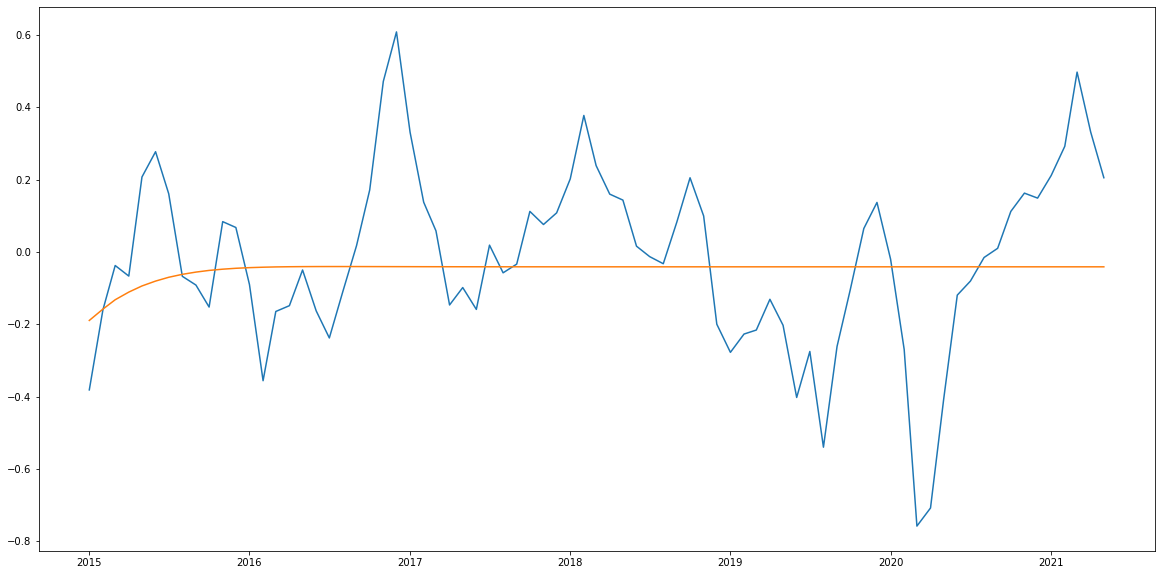

In [61]:
plt.plot(pl_tst)

In [62]:
from statsmodels.tsa.arima_model import ARIMA

### Non stationary train test split

In [63]:
twenty = int(len(ys_month) * 0.2)
train, test = ys_month[:-twenty], ys_month[-twenty:]

In [64]:
p = d = q = (0,1,2,3)


combo, value = (None, None)
for ar in p:
    for ma in q:
        for diff in d:
            try:
                model = ARIMA(train, order=(ar, diff, ma)).fit()
                print('Combo:', (ar, diff, ma),'AIC:', model.aic)

                if value is None or model.aic < value:
                    combo, value = ((ar, diff, ma), model.aic)
                    print(f'\tBest Parameters Updated')
            except ValueError:
                pass
            
print(f'\n{"*"*20}\nOptimal ARIMA order: {combo}')

Combo: (0, 0, 0) AIC: 1285.3936202229456
	Best Parameters Updated
Combo: (0, 1, 0) AIC: -36.87842117812619
	Best Parameters Updated
Combo: (0, 2, 0) AIC: 78.66705977188971
Combo: (0, 0, 1) AIC: 898.1803554675212
Combo: (0, 1, 1) AIC: -65.83839801474721
	Best Parameters Updated
Combo: (0, 2, 1) AIC: -28.244018072749668
Combo: (0, 1, 2) AIC: -64.58157628579306
Combo: (0, 2, 2) AIC: -57.58664431106547
Combo: (0, 1, 3) AIC: -62.72103386730498
Combo: (0, 2, 3) AIC: -56.247644421739324
Combo: (1, 0, 0) AIC: -27.3026808631447
Combo: (1, 1, 0) AIC: -59.510217565065545
Combo: (1, 2, 0) AIC: 56.335469881689164
Combo: (1, 0, 1) AIC: -57.8982015117781
Combo: (1, 1, 1) AIC: -64.4878488500251
Combo: (1, 2, 1) AIC: -51.32351832536142
Combo: (1, 0, 2) AIC: -56.332580135160015
Combo: (1, 1, 2) AIC: -74.98288324669704
	Best Parameters Updated
Combo: (1, 2, 2) AIC: -56.1720676325167
Combo: (1, 0, 3) AIC: -54.35784503730406
Combo: (1, 2, 3) AIC: -54.890699313113714
Combo: (2, 0, 0) AIC: -51.91570284322176

In [65]:
arima_model = ARIMA(train, order=(1,1,2)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.yr_10   No. Observations:                  311
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  42.491
Method:                       css-mle   S.D. of innovations              0.210
Date:                Wed, 19 May 2021   AIC                            -74.983
Time:                        15:32:05   BIC                            -56.284
Sample:                    02-01-1989   HQIC                           -67.509
                         - 12-01-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0202      0.002    -12.354      0.000      -0.023      -0.017
ar.L1.D.yr_10     0.8975      0.027     32.654      0.000       0.844       0.951
ma.L1.D.yr_10    -0.6240      0.056    -11.232      0.000      -0.733      -0.515
ma.L2.D.yr_10    -0.3760      0.055     -6.844      0.000      -0.484      -0.268
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1142           +0.0000j            1.1142            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.6596           +0.0000j            2.6596            0.5000
-----------------------------------------------------------------------------
"""

In [66]:
def get_MSE(model, trn, tst):
    pred = model.forecast(steps=len(tst))[0]
    mse_tst =  round(mean_squared_error(tst, pred), 3)

    print(mse_tst)

In [67]:
get_MSE(arima_model, train, test)

1.024


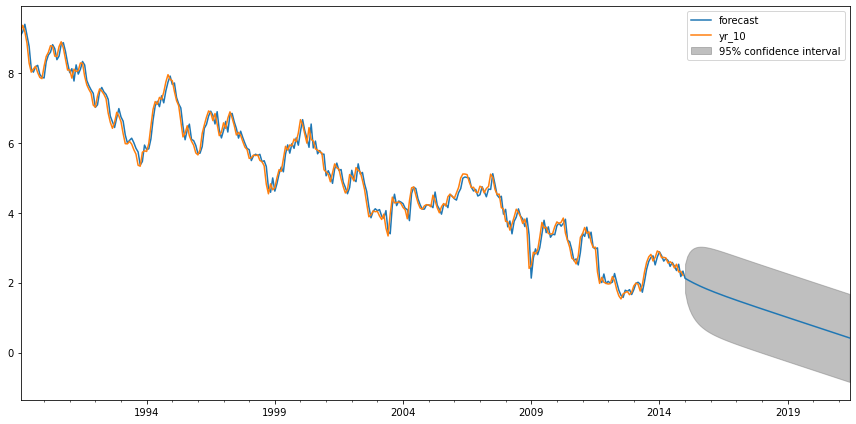

In [68]:
fig, ax = plt.subplots(figsize=(12, 6))
arima_model.plot_predict(1, len(train)+77, ax=ax)
fig.tight_layout()

In [69]:
arima_model = ARIMA(train, order=(0,1,1)).fit()
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.yr_10   No. Observations:                  311
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  35.919
Method:                       css-mle   S.D. of innovations              0.216
Date:                Wed, 19 May 2021   AIC                            -65.838
Time:                        15:32:06   BIC                            -54.619
Sample:                    02-01-1989   HQIC                           -61.354
                         - 12-01-2014                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0223      0.016     -1.359      0.174      -0.054       0.010
ma.L1.D.yr_10     0.3414      0.055      6.158      0.000       0.233       0.450
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.9293           +0.0000j            2.9293            0.5000
-----------------------------------------------------------------------------
"""

In [70]:
get_MSE(arima_model, train, test)

0.912


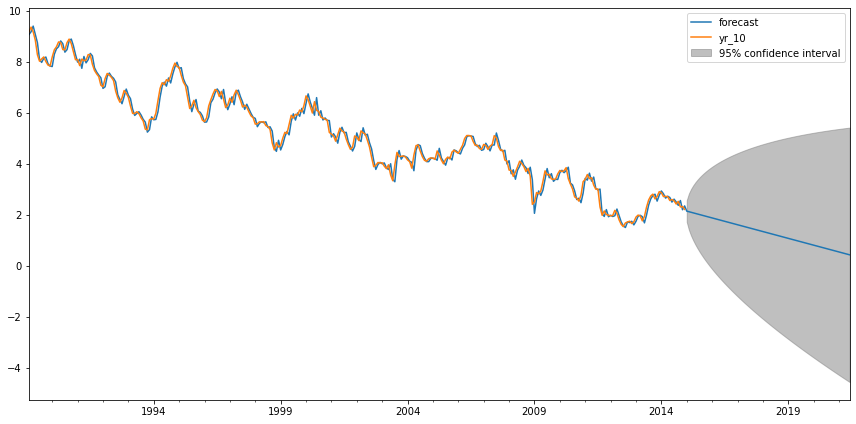

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
arima_model.plot_predict(1, len(train)+77, ax=ax)
fig.tight_layout()

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [73]:
'''# Setting up parameter combinations.
p = q = (0, 1,2)
d = 0

pdq = [(ar, d, ma) for ar in p for ma in q]
pdqs = [(c[0], d, c[2], 12) for c in pdq]

# Iterate and try models.
combo, value = (None, None)
for pdq_combo in pdq:
    for pdqs_combo in pdqs:
        try:
            model = SARIMAX(
               np.asarray(train), 
               order=pdq_combo,
               seasonal_order=pdqs_combo,
               enforce_stationarity=False,
               enforce_invertibility=False
               )
            output = model.fit()

            if value is None or output.aic < value:
                combo, value = ((pdq_combo, pdqs_combo), output.aic)
                print('SARIMA Combos:', (pdq_combo, pdqs_combo),'AIC:', output.aic)
        except ValueError:
            pass      
            
print(f'\n{"*"*20}\nOptimal SARIMA order: {combo}')'''

'# Setting up parameter combinations.\np = q = (0, 1,2)\nd = 0\n\npdq = [(ar, d, ma) for ar in p for ma in q]\npdqs = [(c[0], d, c[2], 12) for c in pdq]\n\n# Iterate and try models.\ncombo, value = (None, None)\nfor pdq_combo in pdq:\n    for pdqs_combo in pdqs:\n        try:\n            model = SARIMAX(\n               np.asarray(train), \n               order=pdq_combo,\n               seasonal_order=pdqs_combo,\n               enforce_stationarity=False,\n               enforce_invertibility=False\n               )\n            output = model.fit()\n\n            if value is None or output.aic < value:\n                combo, value = ((pdq_combo, pdqs_combo), output.aic)\n                print(\'SARIMA Combos:\', (pdq_combo, pdqs_combo),\'AIC:\', output.aic)\n        except ValueError:\n            pass      \n            \nprint(f\'\n{"*"*20}\nOptimal SARIMA order: {combo}\')'

In [74]:
 sari_model = SARIMAX(
    train, 
    order=(1, 0, 1),
    seasonal_order=(0, 0, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
    ).fit()

print(sari_model.summary())


                               SARIMAX Results                                
Dep. Variable:                  yr_10   No. Observations:                  312
Model:               SARIMAX(1, 0, 1)   Log Likelihood                  36.154
Date:                Wed, 19 May 2021   AIC                            -66.308
Time:                        15:32:06   BIC                            -55.099
Sample:                    01-01-1989   HQIC                           -61.827
                         - 12-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9943      0.003    323.234      0.000       0.988       1.000
ma.L1          0.3408      0.048      7.109      0.000       0.247       0.435
sigma2         0.0463      0.003     15.231      0.0

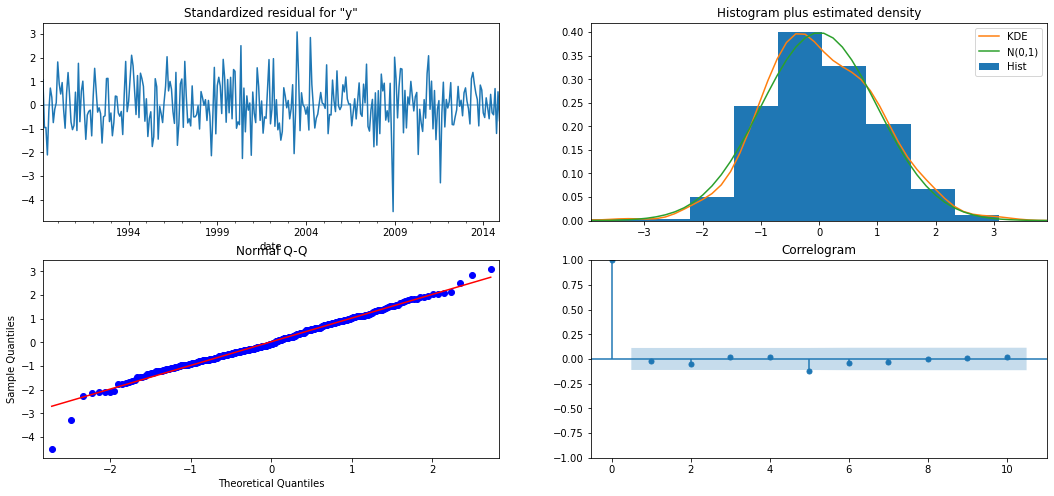

In [75]:
sari_model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [76]:
sari_pred = sari_model.forecast(steps=len(test))
sari_mse = round(mean_squared_error(test, sari_pred), 3)

In [77]:
sari_mse

0.439

In [78]:
sari_pred

2015-01-01    2.149027
2015-02-01    2.136780
2015-03-01    2.124602
2015-04-01    2.112494
2015-05-01    2.100454
                ...   
2021-01-01    1.424051
2021-02-01    1.415936
2021-03-01    1.407866
2021-04-01    1.399842
2021-05-01    1.391865
Freq: MS, Name: predicted_mean, Length: 77, dtype: float64

In [79]:
sari_model.get_prediction(start=pd.to_datetime('2015-01-01'), 
                        end=pd.to_datetime('2021-05-01'), 
                        dynamic=False )

In [80]:
tst = pd.DataFrame(test)

In [81]:
tst.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2015-01-01 to 2021-05-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr_10   77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


In [82]:
sari_model

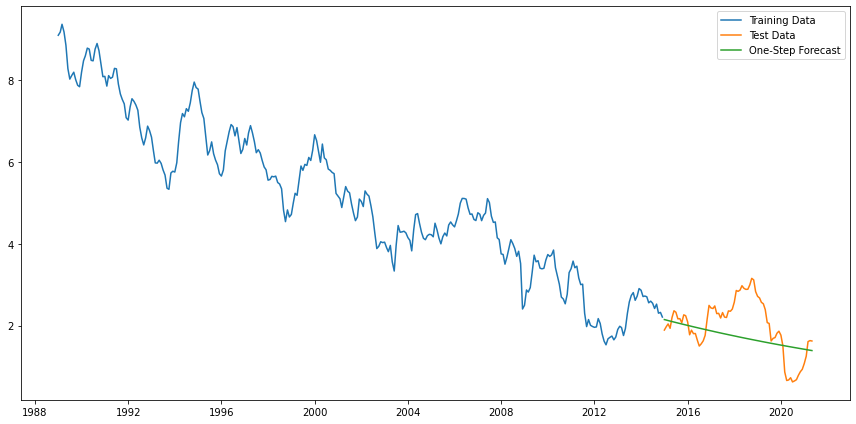

In [83]:
pred = sari_model.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    end=pd.to_datetime('2021-5-01'),
    dynamic=True)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train, label='Training Data')
ax.plot(test, label='Test Data')
ax.plot(pred.predicted_mean, label='One-Step Forecast')
ax.legend()
fig.tight_layout()

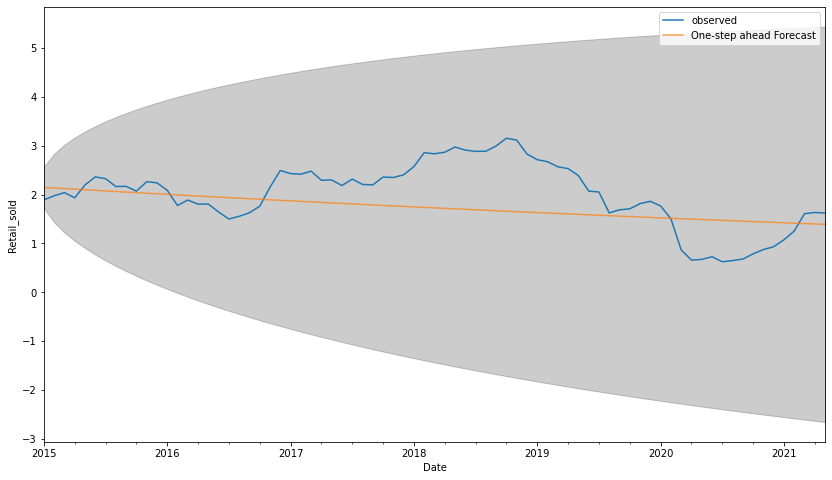

In [84]:
pred = sari_model.get_prediction(
    start=pd.to_datetime('2015-01-01'),
    end=pd.to_datetime('2021-5-01'),
    dynamic=False)

pred_ci = pred.conf_int()
ax = test.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',
alpha=.7, figsize=(14, 8))
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()


In [85]:
preds = sari_model.get_forecast( steps=77,
    dynamic=False)

In [86]:
tst_prd =pd.DataFrame(test)
tst_prd['pred_1'] = preds.predicted_mean
tst_prd

yr_10    pred_1
date                          
2015-01-01  1.892273  2.149027
2015-02-01  1.977500  2.136780
2015-03-01  2.042727  2.124602
2015-04-01  1.935000  2.112494
2015-05-01  2.198095  2.100454
...              ...       ...
2021-01-01  1.075238  1.424051
2021-02-01  1.255000  1.415936
2021-03-01  1.610870  1.407866
2021-04-01  1.635000  1.399842
2021-05-01  1.625556  1.391865

[77 rows x 2 columns]

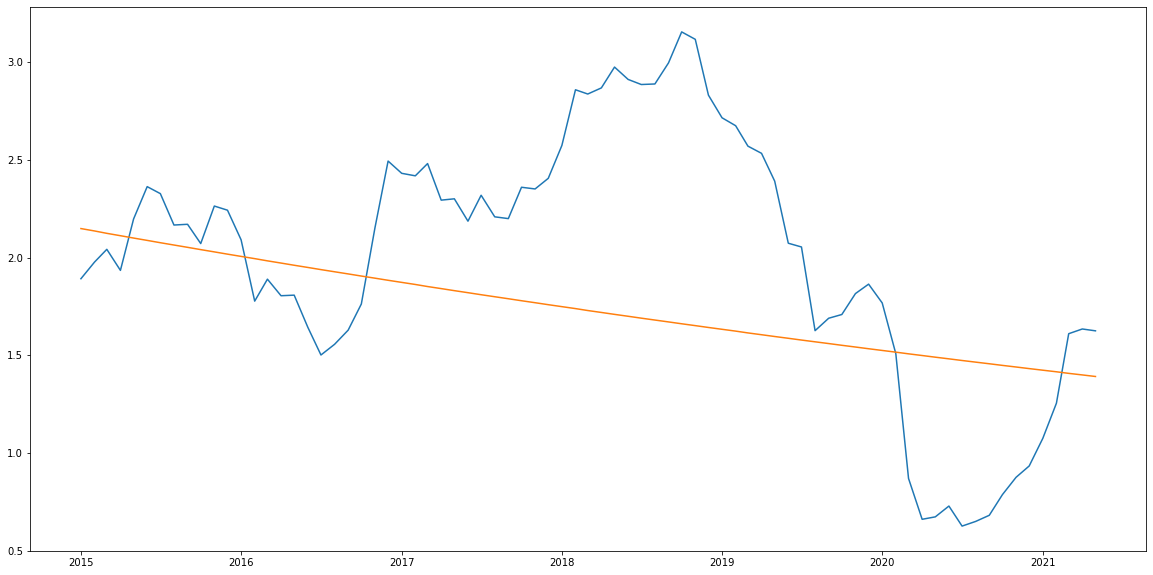

In [87]:
plt.plot(tst_prd)

In [88]:
len(preds.predicted_mean)

77

In [89]:
 sari_model = SARIMAX(
    np.asarray(train), 
    order=(0, 1, 1),
    seasonal_order=(0, 0, 0, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
    ).fit()

print(sari_model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  312
Model:               SARIMAX(0, 1, 1)   Log Likelihood                  34.180
Date:                Wed, 19 May 2021   AIC                            -64.359
Time:                        15:32:09   BIC                            -56.893
Sample:                             0   HQIC                           -61.374
                                - 312                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3456      0.048      7.175      0.000       0.251       0.440
sigma2         0.0469      0.003     15.194      0.000       0.041       0.053
Ljung-Box (L1) (Q):                   0.11   Jarque-

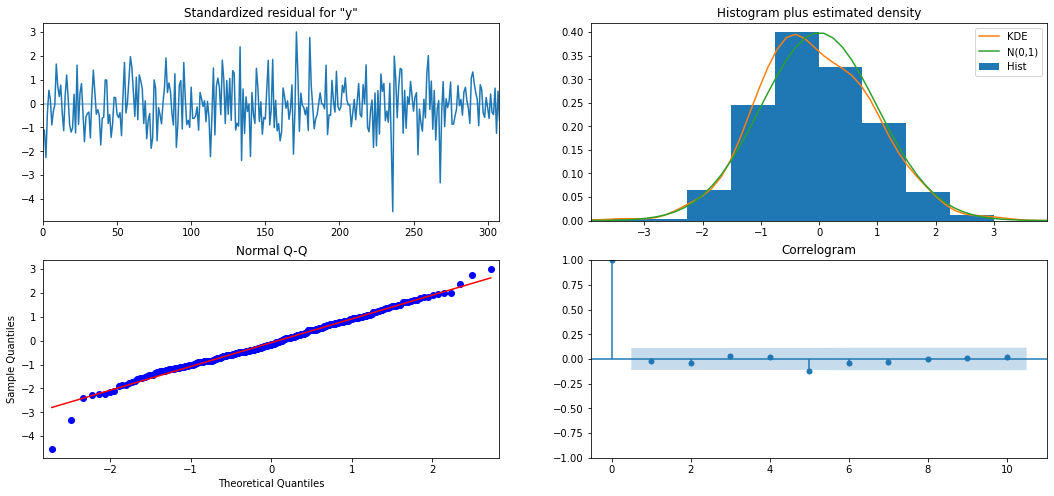

In [90]:
sari_model.plot_diagnostics(figsize=(18, 8))
plt.show()

In [91]:
sari_pred = sari_model.forecast(steps=len(test))
sari_mse = round(mean_squared_error(test, sari_pred), 3)
sari_mse

0.455

In [92]:
preds = sari_model.get_forecast( steps=77,
    dynamic=False)

In [93]:
tst_prd

yr_10    pred_1
date                          
2015-01-01  1.892273  2.149027
2015-02-01  1.977500  2.136780
2015-03-01  2.042727  2.124602
2015-04-01  1.935000  2.112494
2015-05-01  2.198095  2.100454
...              ...       ...
2021-01-01  1.075238  1.424051
2021-02-01  1.255000  1.415936
2021-03-01  1.610870  1.407866
2021-04-01  1.635000  1.399842
2021-05-01  1.625556  1.391865

[77 rows x 2 columns]

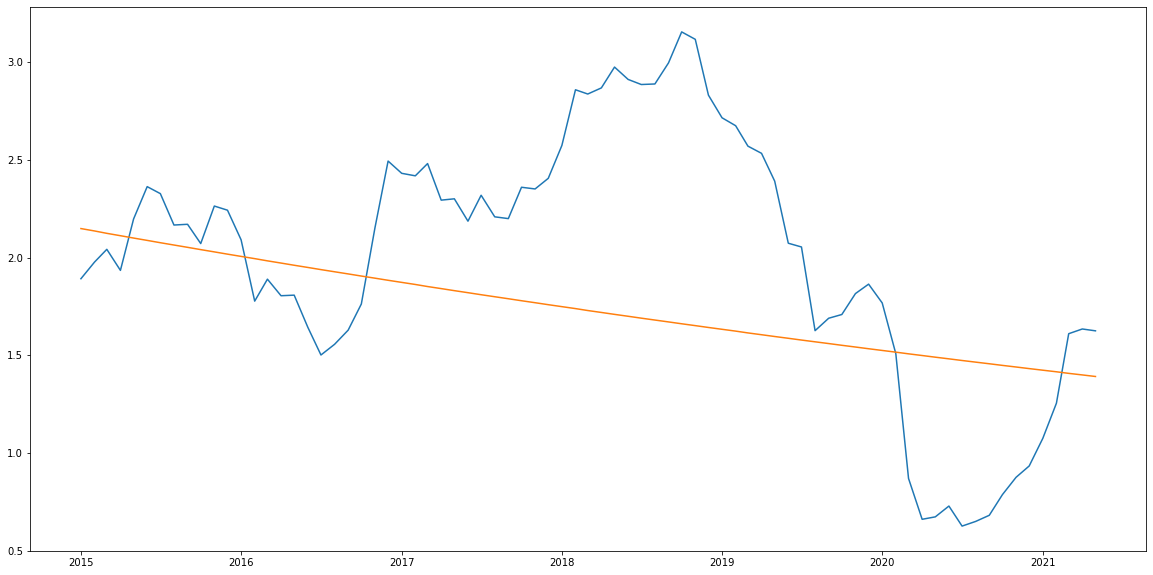

In [94]:
plt.plot(tst_prd)

In [95]:
minus_rm

date
1989-05-01   -0.365550
1989-06-01   -0.759096
1989-07-01   -0.745286
1989-08-01   -0.336338
1989-09-01   -0.039926
                ...   
2021-01-01    0.211815
2021-02-01    0.292617
2021-03-01    0.497667
2021-04-01    0.331990
2021-05-01    0.205654
Freq: MS, Name: yr_10, Length: 385, dtype: float64

# RNN

In [96]:
ml_data = ys_month
p_60 = int(len(ml_data) * 0.6)
p_80 = int(len(ml_data) * 0.8)

train = ml_data[:p_60]
val = ml_data[p_60:p_80]
test = ml_data[p_80:]

In [97]:
X_train, y_train = (train), (train.shift(-1, freq='MS'))
X_val, y_val =(val), (val.shift(-1, freq='MS'))
X_test, y_test =(test), (test.shift(-1, freq='MS'))

In [98]:
X_train, y_train = np.array(X_train[:-1]), np.array(y_train[1:])
X_val, y_val =  np.array(X_val[:-1]), np.array(y_val[1:])
X_test, y_test = np.array(X_test[:-1]), np.array(y_test[1:])

In [99]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 1, 1))
X_val = np.reshape(X_val, (X_val.shape[0], 1, 1))
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(232, 1, 1)
(77, 1, 1)
(77, 1, 1)


In [100]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras import optimizers
import tensorflow as tf

In [101]:
batch_size = 1
look_back = 1


model = Sequential()
model.add(LSTM(6, batch_input_shape=(batch_size, look_back, 1),
                return_sequences=True, stateful=True))
model.add(LSTM(6, return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val), callbacks=es,
                    epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
232/232 - 2s - loss: 30.3834 - val_loss: 1.2601
Epoch 2/100
232/232 - 0s - loss: 10.0767 - val_loss: 1.9432
Epoch 3/100
232/232 - 0s - loss: 3.8973 - val_loss: 5.5935
Epoch 4/100
232/232 - 0s - loss: 2.4132 - val_loss: 8.1127
Epoch 5/100
232/232 - 0s - loss: 2.1176 - val_loss: 9.1695
Epoch 6/100
232/232 - 0s - loss: 2.0653 - val_loss: 9.3879
Epoch 7/100
232/232 - 0s - loss: 1.9871 - val_loss: 6.7374
Epoch 8/100
232/232 - 0s - loss: 1.7315 - val_loss: 4.6184
Epoch 9/100
232/232 - 0s - loss: 1.3717 - val_loss: 0.5309
Epoch 10/100
232/232 - 0s - loss: 0.8786 - val_loss: 0.3195
Epoch 11/100
232/232 - 0s - loss: 0.5635 - val_loss: 0.1155
Epoch 12/100
232/232 - 0s - loss: 0.4015 - val_loss: 0.0659
Epoch 13/100
232/232 - 0s - loss: 0.3167 - val_loss: 0.0790
Epoch 14/100
232/232 - 0s - loss: 0.3384 - val_loss: 0.1245
Epoch 15/100
232/232 - 0s - loss: 0.2334 - val_loss: 0.1434
Epoch 16/100
232/232 - 0s - loss: 0.3752 - val_loss: 0.0921
Epoch 17/100
232/232 - 0s - loss: 0.2063 - val_

Train: 1.034, Val: 1.774


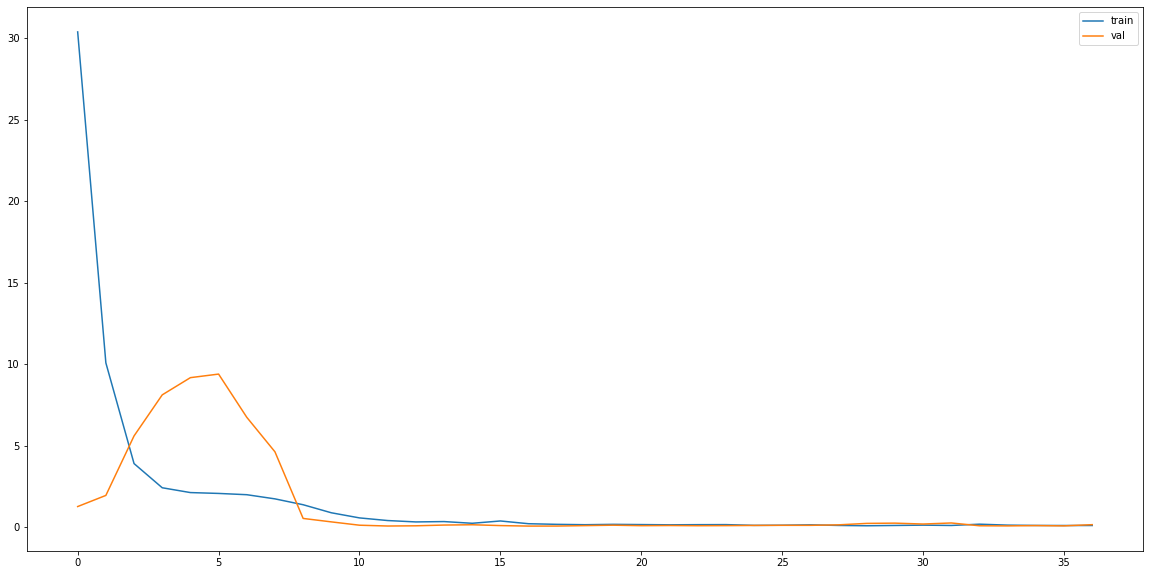

In [102]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
val_acc = model.evaluate(X_val, y_val, verbose=0)
print('Train: %.3f, Val: %.3f' % (train_acc, val_acc))
# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [103]:
testPredict = model.predict(X_val, batch_size=batch_size)
trainPredict = model.predict(X_train, batch_size=batch_size)

In [104]:
y_hat =testPredict.reshape(-1)

In [106]:
res =pd.DataFrame(y_val)

In [107]:
res.loc[:,1] = y_hat

In [109]:
round(mean_squared_error(y_test, y_hat), 3)

1.896

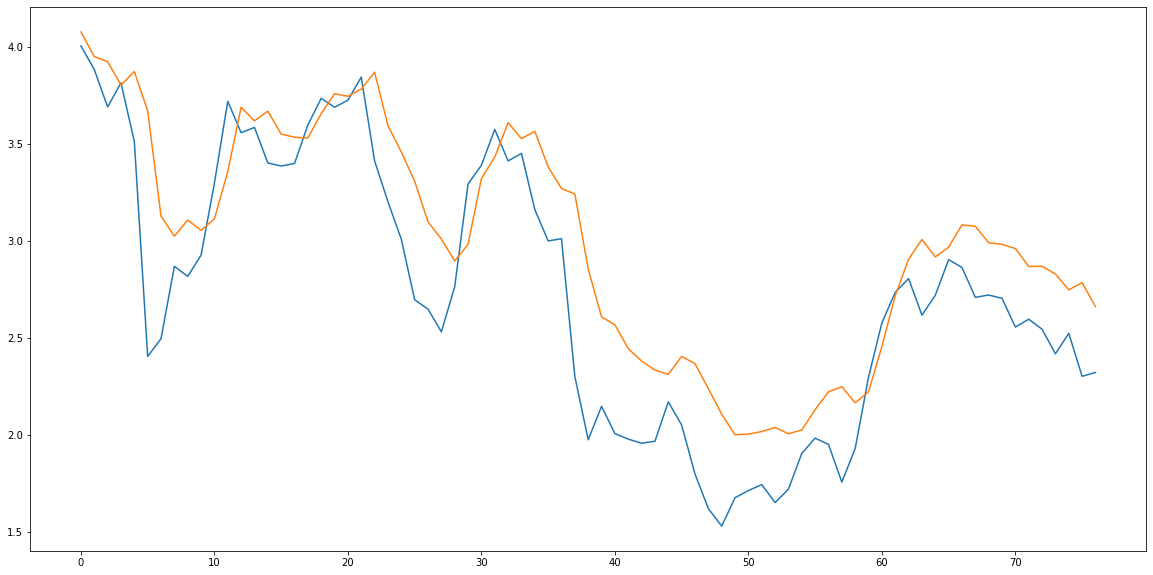

In [110]:
plt.plot(res)

In [111]:
X_tv =np.concatenate((X_train, X_val), axis=None)
y_tv =np.concatenate((y_train, y_val), axis=None)

In [112]:
len(X_tv)

309

In [113]:
len(y_tv)

309

In [114]:
X_tv = np.reshape(X_tv, (X_tv.shape[0], 1, 1))

In [117]:
es =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)

batch_size = 1
look_back = 1


model2 = Sequential()
model2.add(LSTM(6, batch_input_shape=(batch_size, look_back, 1),
                return_sequences=True, stateful=True))
model2.add(LSTM(6, return_sequences=True))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
history2 = model2.fit(X_tv, y_tv, 
                    validation_data=(X_test, y_test), callbacks=es,
                    epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/100
309/309 - 2s - loss: 20.9340 - val_loss: 0.5808
Epoch 2/100
309/309 - 0s - loss: 6.7000 - val_loss: 4.8718
Epoch 3/100
309/309 - 0s - loss: 3.8335 - val_loss: 7.8837
Epoch 4/100
309/309 - 0s - loss: 3.4710 - val_loss: 8.1665
Epoch 5/100
309/309 - 0s - loss: 3.2326 - val_loss: 7.1783
Epoch 6/100
309/309 - 0s - loss: 2.8841 - val_loss: 2.7943
Epoch 7/100
309/309 - 0s - loss: 1.8892 - val_loss: 1.5006
Epoch 8/100
309/309 - 0s - loss: 1.1372 - val_loss: 0.0837
Epoch 9/100
309/309 - 0s - loss: 0.7645 - val_loss: 0.1292
Epoch 10/100
309/309 - 0s - loss: 0.5697 - val_loss: 0.1304
Epoch 11/100
309/309 - 0s - loss: 0.4183 - val_loss: 0.0558
Epoch 12/100
309/309 - 0s - loss: 0.3224 - val_loss: 0.0497
Epoch 13/100
309/309 - 0s - loss: 0.2425 - val_loss: 0.0524
Epoch 14/100
309/309 - 0s - loss: 0.1893 - val_loss: 0.0569
Epoch 15/100
309/309 - 0s - loss: 0.1549 - val_loss: 0.0612
Epoch 16/100
309/309 - 0s - loss: 0.1343 - val_loss: 0.0530
Epoch 17/100
309/309 - 0s - loss: 0.1226 - val_l

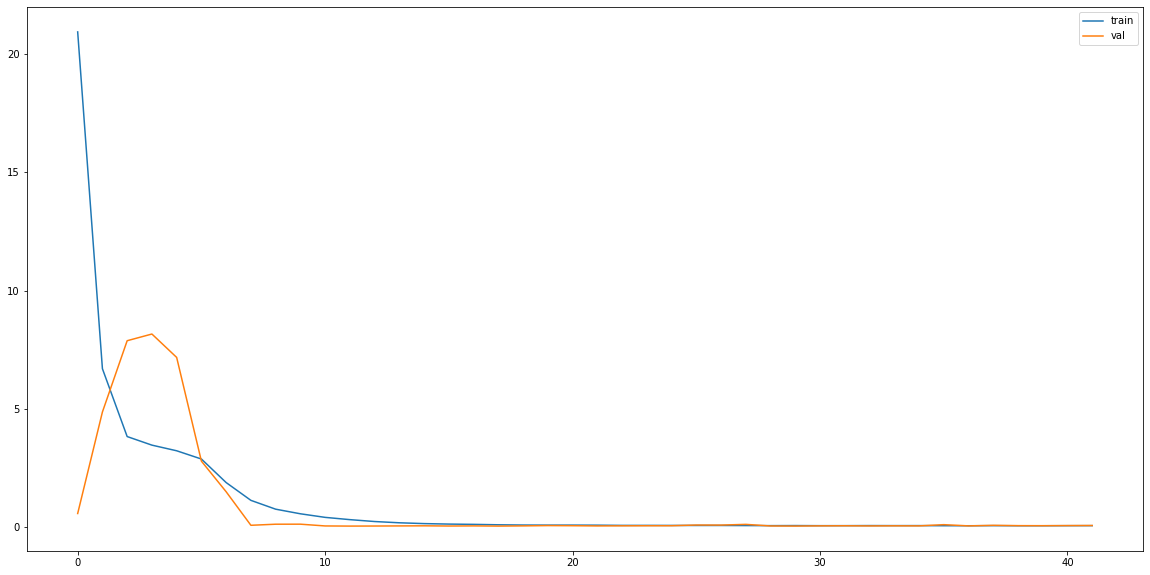

In [119]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()

In [120]:
train_acc = model2.evaluate(X_tv, y_tv, verbose=0)
test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.895, Val: 0.250


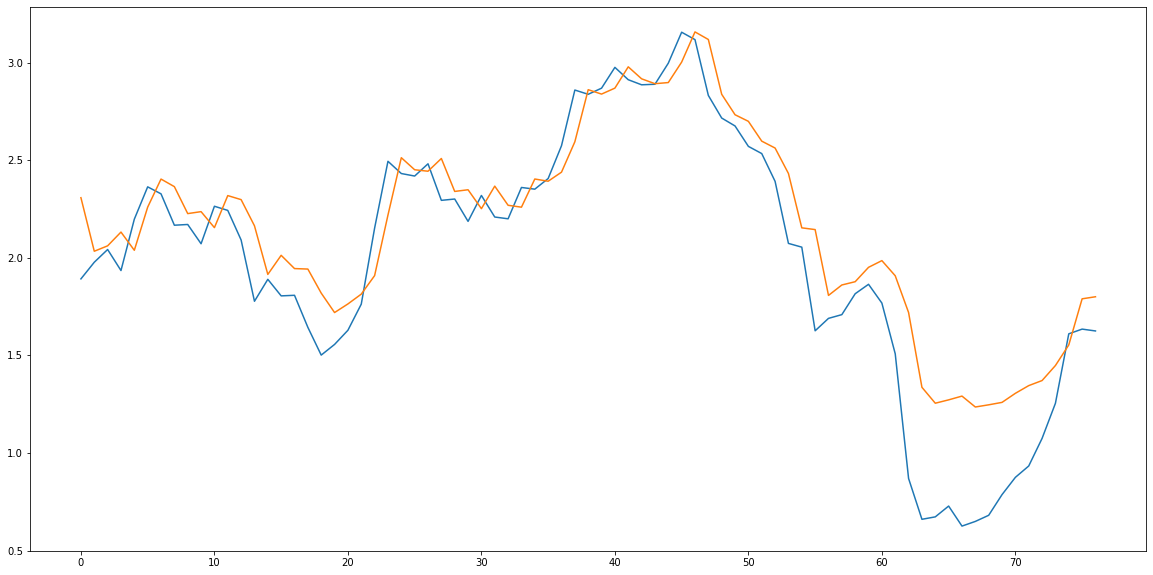

In [122]:
testPredict = model2.predict(X_test, batch_size=batch_size)
y_hat =testPredict.reshape(-1)
res =pd.DataFrame(y_test)
res.loc[:,1] = y_hat
plt.plot(res)

In [173]:
res

0         1
0   1.892273  2.308086
1   1.977500  2.033866
2   2.042727  2.061547
3   1.935000  2.132028
4   2.198095  2.038803
..       ...       ...
72  1.075238  1.371535
73  1.255000  1.448487
74  1.610870  1.553847
75  1.635000  1.790186
76  1.625556  1.800716

[77 rows x 2 columns]

In [206]:
x_input = np.array([X_test[-1]])
temp_input=list(x_input)
lst_output=[]
months = 24

for month in range(0, months ,1):
    
    if(len(temp_input)>1):
        x_input=np.array(temp_input[1:])
        #print(x_input)
        x_input = x_input.reshape((1, 1, 1))
        #print(x_input)
        yhat = model2.predict(x_input, verbose=0)
        val = yhat.reshape(-1)
        temp_input.append(val)
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(val)
        
    else:
        x_input = x_input.reshape((1,  1, 1))
        yhat = model.predict(x_input, verbose=0)
        val = yhat.reshape(-1)
        temp_input.append(val)
        lst_output.append(val)
        
    

forecasts =np.array(lst_output).reshape(-1)

In [207]:
len(forecasts)

24

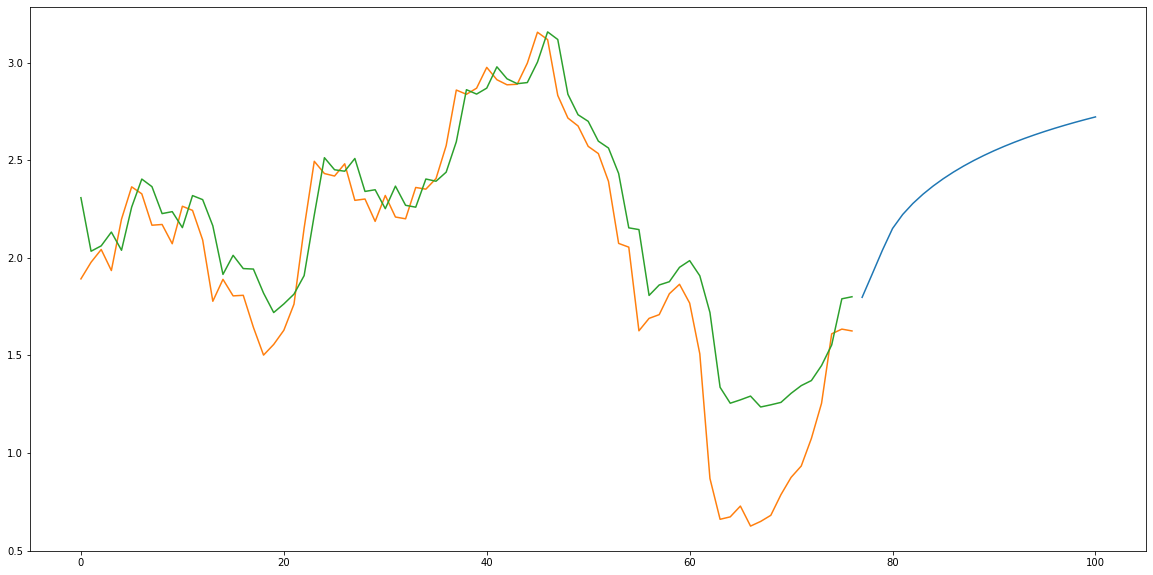

In [212]:
plt.plot(np.arange(77,77+months), forecasts)
plt.plot(res)

In [213]:
forecasts =pd.Series(forecasts)

In [214]:
saif =pd.concat([res.loc[:,1], forecasts], ignore_index=True)

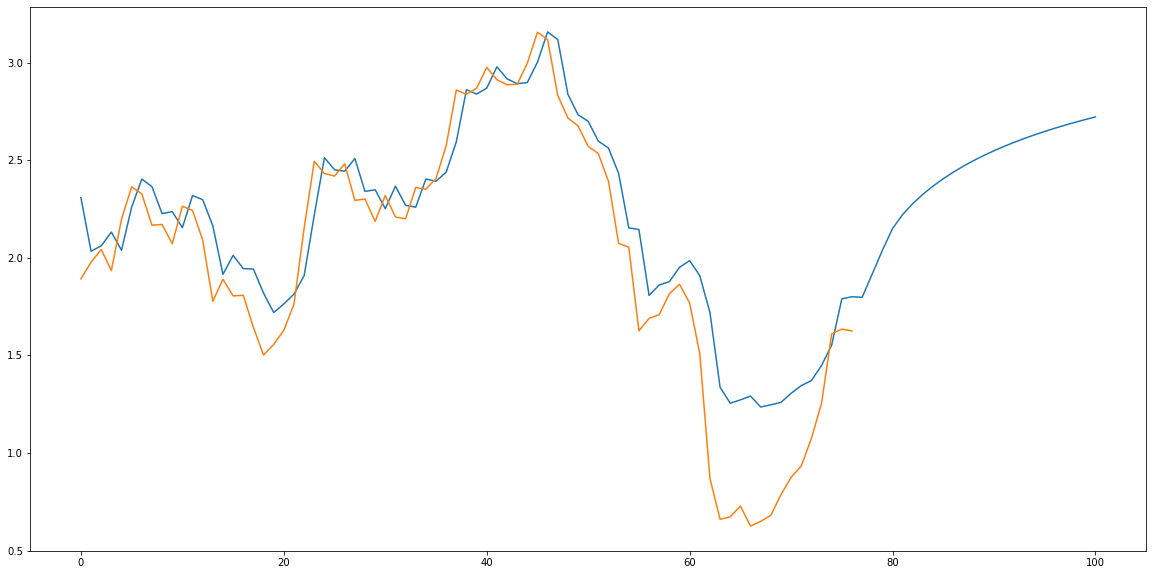

In [215]:
plt.plot(saif)
plt.plot(y_test)